# Filtering: removing artifacts in BPM and WPM

For Rayleigh-Sommerfeld approach, masks are considered using Thin Element Approximation (TEA), that is, they are infinitely thin. This can be useful in many situations, but does not allow determining the field inside elements.
 
With Beam Propagation Method (BPM) and Wave Propagation Method (WPM), we define an XZ plane with a background index (n=1 for vaccum, for example) and insert optical elements considering its shape and refractive index. We also need to include the input scalar field and propagate. Since the field is computed sequentially, no multiprocessing is possible for determining the u(x,z) field in monocromatic, single field. 
 
One disventage of this technique is that no reflections are considered, although perhaps they can be included in the future.

One of the limits of BPM and WPM is the resolution in the grid of x,z. If the grid is not small enough, for example, in a phase mask like a lens, the shape is not considered continuous but with edges. In this case, edges produce a discontinuity that proagates.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from diffractio import degrees, mm, plt, sp, um, np

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ


## Bad computation with BPM

In [3]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 600 * um, 512 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens_convergent(r0=(0, 0),
                              aperture=300 * um,
                              radius=(1000 * um, -250 * um),
                              thickness=100 * um,
                              refractive_index=2,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))
u1.clear_field()

print(focal)


192.30769230769232


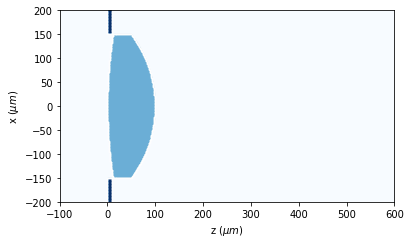

In [4]:
u1.draw_refractive_index(scale='scaled')
edge_matrix = u1.borders


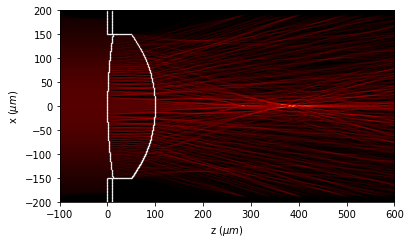

In [5]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')


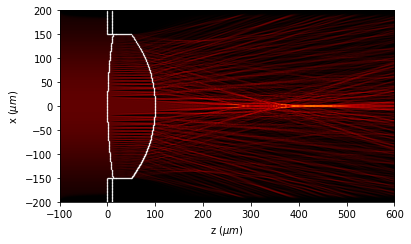

In [6]:
u1.clear_field()
u1.WPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')


## Better resolution

In [7]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 1)
z0 = np.linspace(-100 * um, 600 * um, 1024 * 2)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens_convergent(r0=(0, 0),
                              aperture=300 * um,
                              radius=(500 * um, -250 * um),
                              thickness=100 * um,
                              refractive_index=1.5,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))


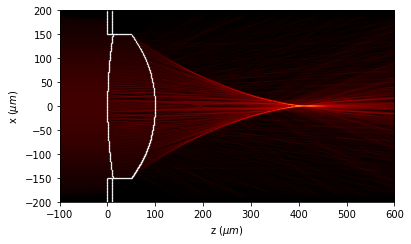

In [8]:
u1.clear_field()
u1.BPM(verbose=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        scale='scaled',
        edge_matrix=edge_matrix)


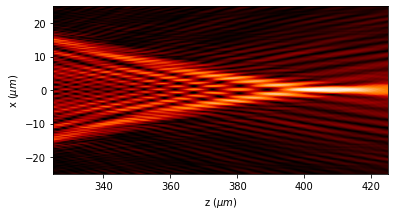

In [9]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-25, 25)
plt.xlim(325, 425)


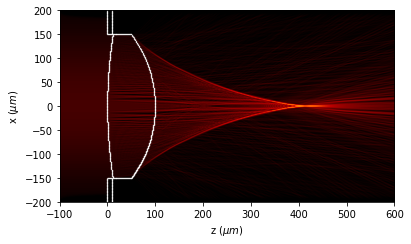

In [10]:
u1.clear_field()
u1.WPM(verbose=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        scale='scaled',
        edge_matrix=edge_matrix)

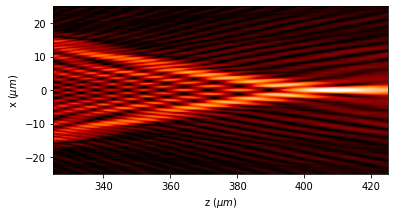

In [11]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-25, 25)
plt.xlim(325, 425)

## Effect of filtering

In [12]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 1)
z0 = np.linspace(-100 * um, 600 * um, 1024 * 2)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens_convergent(r0=(0, 0),
                              aperture=300 * um,
                              radius=(500 * um, -250 * um),
                              thickness=100 * um,
                              refractive_index=1.5,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))


In [13]:
u1.smooth_refractive_index(type_filter=1, pixels_filtering=10)


In [14]:
u1.clear_field()
u1.BPM(verbose=False)


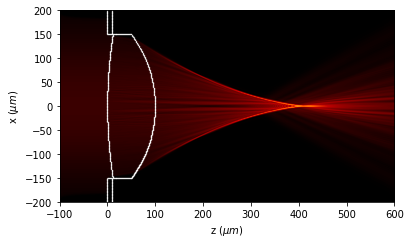

In [15]:
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        scale='scaled',
        edge_matrix=edge_matrix)


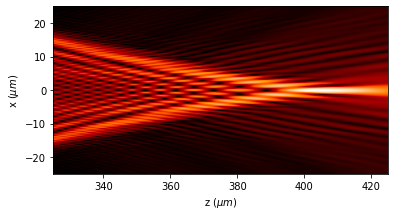

In [16]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-25, 25)
plt.xlim(325, 425)


Now, it is possible to perform a filtering for WPM method, but it is necessary to discretize the refractive index, since the computing time in WPM is proportional to the number of refractive indexes at each iteration.

In [17]:
u1.discretize_refractive_index(num_layers=8, new_field=False)


In [18]:
u1.clear_field()
u1.WPM(verbose=False)


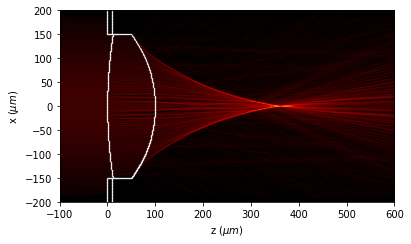

In [19]:
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        scale='scaled',
        edge_matrix=edge_matrix)


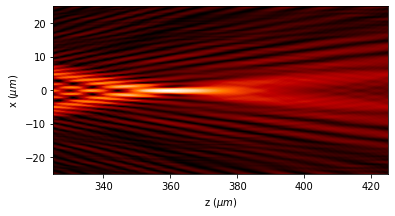

In [20]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-25, 25)
plt.xlim(325, 425)


As a conclusion, WPM and BPM does not produce the same results. The reason is that BPM is developed for low variations in refractive indexes. In this problem we cannot be considered the variation low. [S. Schmidt "Wave-optical modeling beyond the thin-element-approximation" Optics Express 24(26) 30188 (2016)  http://dx.doi.org/10.1364/OE.24.030188]

Nevertheless, BPM accepts arbitrary refractive indexes, and the algorithm of WPM is effective when assuming that only a limited number of different refractive indices are present in the problem. [Brenner, Karl-Heinz. "A high-speed version of the wave propagation method applied to micro-optics."  16th Workshop on Information Optics (WIO). IEEE, (2017)].